## Bagging on Imbalanced Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_test.csv')

# Bagging Classifier with Decision Tree Base Estimator


In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)
bagging_clf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)

In [ ]:
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:877: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   random_state=42),
                  max_features=0.8, max_samples=0.8, n_estimators=50,
                  random_state=42)

In [ ]:
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.98


In [ ]:
joblib.dump(bagging_clf, '/content/drive/MyDrive/PredictiveMaintenance/Models/dtree_bagging_on_imbalanced_data.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/dtree_bagging_on_imbalanced_data.pkl']

In [ ]:
y_pred_proba = bagging_clf.predict_proba(X_test)

In [ ]:
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2902
           1       0.00      0.00      0.00         1
           2       0.80      0.55      0.65        29
           3       1.00      0.32      0.48        25
           4       1.00      0.27      0.43        22
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.54      0.31      0.36      3000
weighted avg       0.97      0.98      0.97      3000



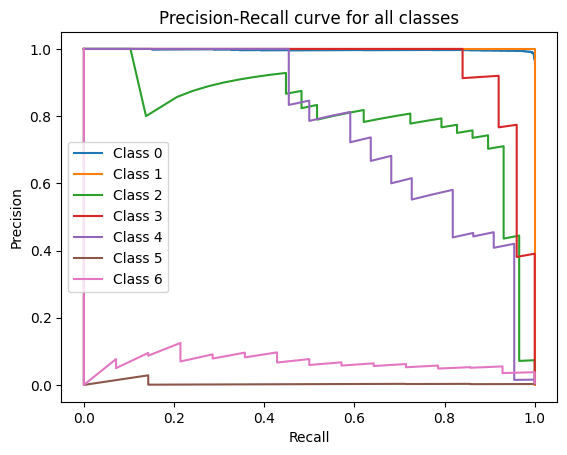

In [ ]:
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

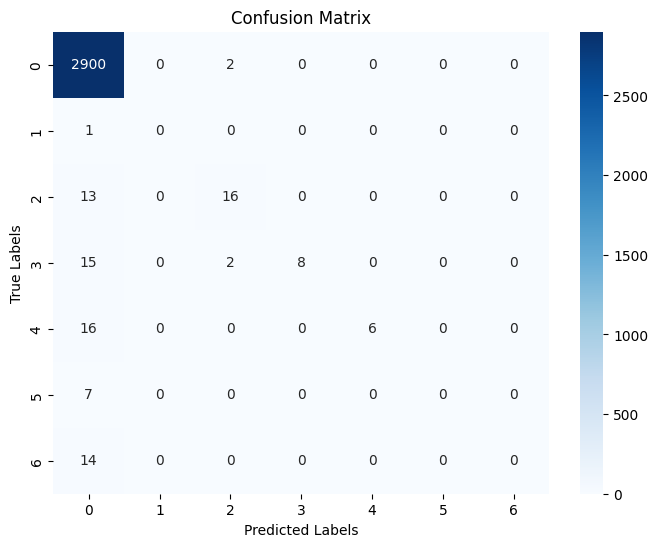

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Bagging Classifier with Random Forest Base Estimator

In [ ]:
base_estimator = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_clf_rf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)

In [ ]:
bagging_clf_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:877: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                   random_state=42),
                  max_features=0.8, max_samples=0.8, n_estimators=50,
                  random_state=42)

In [ ]:
y_pred_train = bagging_clf_rf.predict(X_train)
y_pred_test = bagging_clf_rf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Testing Accuracy: 0.97


In [ ]:
joblib.dump(bagging_clf_rf, '/content/drive/MyDrive/PredictiveMaintenance/Models/rf_bagging_on_imbalanced_data.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/rf_bagging_on_imbalanced_data.pkl']

In [ ]:
y_pred_proba = bagging_clf.predict_proba(X_test)

In [ ]:
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2902
           1       0.00      0.00      0.00         1
           2       0.84      0.55      0.67        29
           3       1.00      0.04      0.08        25
           4       1.00      0.09      0.17        22
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.55      0.24      0.27      3000
weighted avg       0.97      0.97      0.96      3000



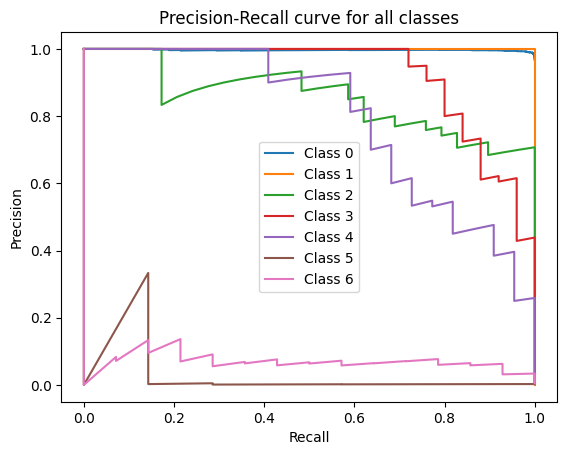

In [ ]:
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

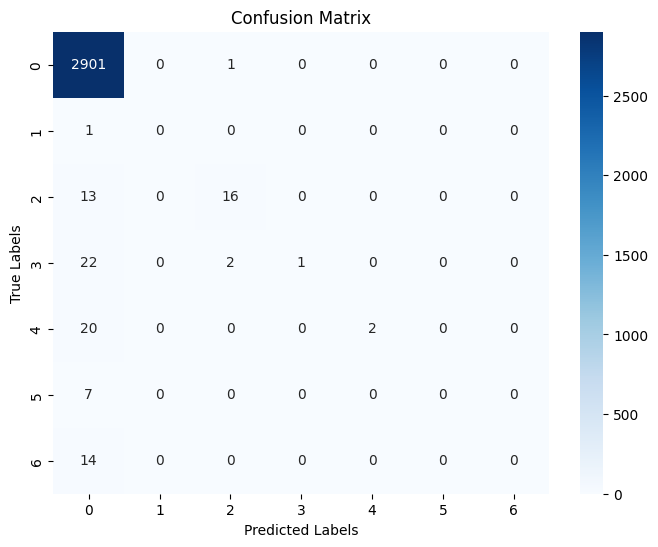

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()